### How to open a github ipynb in google colab?

Replacing `https://github.com` by `https://colab.research.google.com/github` as mentioned in [stackoverflow](https://stackoverflow.com/questions/62596466/how-can-i-run-notebooks-of-a-github-project-in-google-colab)

In [1]:
%matplotlib inline

In [2]:
!wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip -P data
!cd data && unzip PennFudanPed.zip

--2025-08-08 18:21:05--  https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip
Resolving www.cis.upenn.edu (www.cis.upenn.edu)... 158.130.69.163, 2607:f470:8:64:5ea5::d
Connecting to www.cis.upenn.edu (www.cis.upenn.edu)|158.130.69.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53723336 (51M) [application/zip]
Saving to: ‘data/PennFudanPed.zip’

PennFudanPed.zip    100%[===================>]  51.23M   197MB/s    in 0.3s    

2025-08-08 18:21:06 (197 MB/s) - ‘data/PennFudanPed.zip’ saved [53723336/53723336]

Archive:  PennFudanPed.zip
   creating: PennFudanPed/
  inflating: PennFudanPed/added-object-list.txt  
   creating: PennFudanPed/Annotation/
  inflating: PennFudanPed/Annotation/FudanPed00001.txt  
  inflating: PennFudanPed/Annotation/FudanPed00002.txt  
  inflating: PennFudanPed/Annotation/FudanPed00003.txt  
  inflating: PennFudanPed/Annotation/FudanPed00004.txt  
  inflating: PennFudanPed/Annotation/FudanPed00005.txt  
  inflating: PennFudanPed

In [3]:
!git clone https://github.com/s-reaungamornrat/video_processing.git

Cloning into 'video_processing'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 62 (delta 25), reused 60 (delta 23), pack-reused 0 (from 0)
Receiving objects: 100% (62/62), 2.03 MiB | 21.02 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [4]:
from video_processing.mask_rcnn.utils.utils import read_annotation, display_image_overlay

image  <class 'torch.Tensor'> torch.Size([3, 438, 567]) torch.uint8
mask  <class 'torch.Tensor'> torch.Size([1, 438, 567]) torch.uint8
{'obj_num': [1, 2, 3, 4], 'label': ['PASpersonWalking', 'PASpersonWalking', 'PASpersonStanding', 'PASpersonWalking'], 'bbox': [[[178, 123], [271, 410]], [[299, 114], [370, 335]], [[446, 104], [507, 315]], [[521, 119], [565, 258]]]}


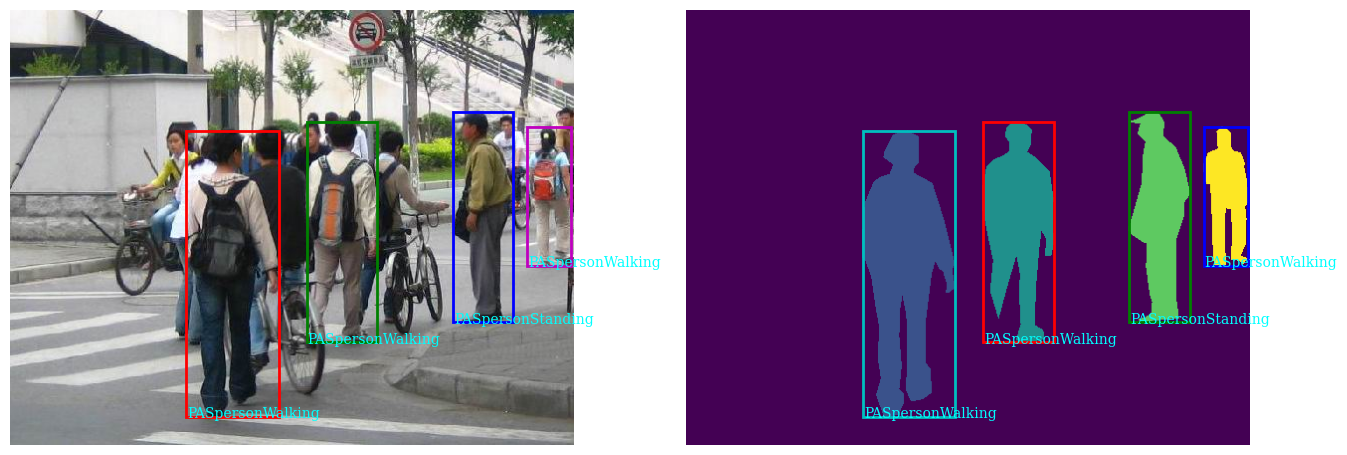

In [5]:
from torchvision.io import read_image

image=read_image('data/PennFudanPed/PNGImages/FudanPed00046.png') # CxHxW -> CxYxX
mask=read_image('data/PennFudanPed/PedMasks/FudanPed00046_mask.png') # CxHxW -> CxYxX
print('image ', type(image), image.shape, image.dtype)
print('mask ', type(mask), mask.shape, mask.dtype)

annotation=read_annotation('data/PennFudanPed/Annotation/FudanPed00046.txt')
print(annotation)
display_image_overlay(image=image, mask=mask, annotation=annotation)

In [5]:
import os
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py")

0

In [6]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print('device ', device)

num_classes=2
# load an instance segmentation model pre-trained on COCO
model=torchvision.models.detection.maskrcnn_resnet50_fpn_v2(weights='DEFAULT')
# # get number of input features for the classifier
# in_features=model.roi_heads.box_predictor.cls_score.in_features
# print('the number of inpute features for classifiers ', in_features)
# # replace the pre-trained head with a new one
# model.roi_heads.box_predictor=FastRCNNPredictor(in_features,  num_classes)

# # get the number of input features for the mask classifiers
# in_features_mask=model.roi_heads.mask_predictor.conv5_mask.in_channels
# print('the number of input features for mask ', in_features_mask)
# hidden_layer=256
# # and replace the mask predictor with a new one
# model.roi_heads.mask_predictor=MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

# move model to the right device
model.to(device)

device  cpu


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth
100%|██████████| 177M/177M [00:01<00:00, 152MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

In [7]:
import torch

import utils
from video_processing.mask_rcnn.dataset.penn_fudan_ped import PennFudanDataset, get_transform

train_dataset=PennFudanDataset(root='data/PennFudanPed', image_dirname='PNGImages', mask_dirname='PedMasks', annotation_dirname='Annotation',
                         transforms=get_transform(is_train=True))#, image_mean=model.transform.image_mean, image_std=model.transform.image_std,
                                                  #min_size=model.transform.min_size, max_size=model.transform.max_size))

# define training and validation data loaders
tarin_loader = torch.utils.data.DataLoader(train_dataset, batch_size=2,shuffle=True,collate_fn=utils.collate_fn)

2  images  [torch.Size([3, 482, 550]), torch.Size([3, 379, 767])] [(torch.float32, tensor(0.), tensor(1.)), (torch.float32, tensor(0.), tensor(1.))]
2  targets  [{'boxes': torch.Size([2, 4]), 'masks': torch.Size([2, 482, 550]), 'labels': torch.Size([2]), 'image_id': 39, 'area': torch.Size([2]), 'iscrowd': torch.Size([2])}, {'boxes': torch.Size([6, 4]), 'masks': torch.Size([6, 379, 767]), 'labels': torch.Size([6]), 'image_id': 144, 'area': torch.Size([6]), 'iscrowd': torch.Size([6])}]
masks  [(torch.uint8, tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8)), (torch.uint8, tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8))]


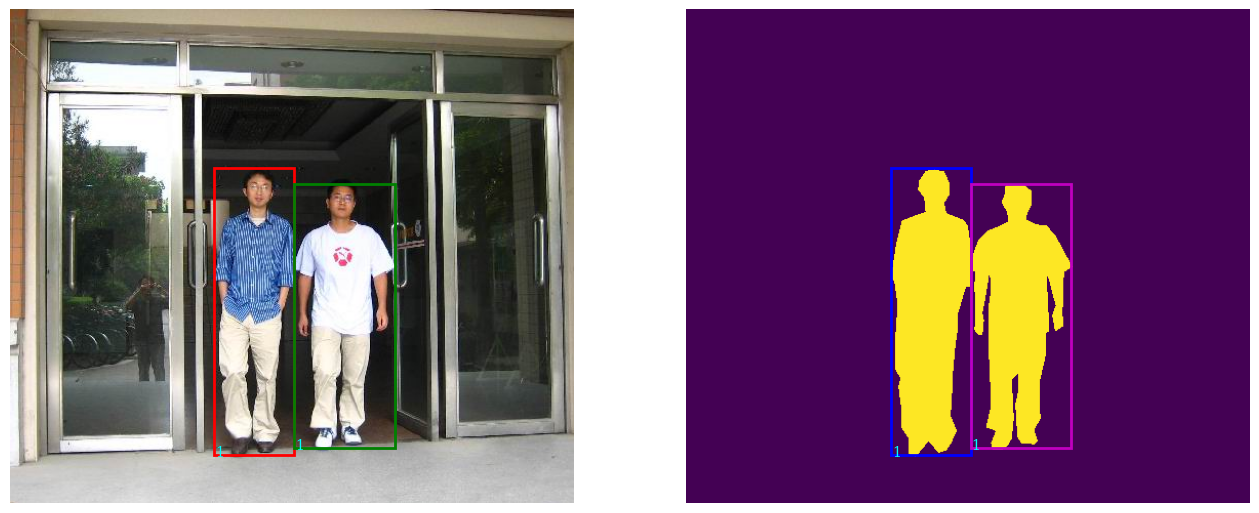

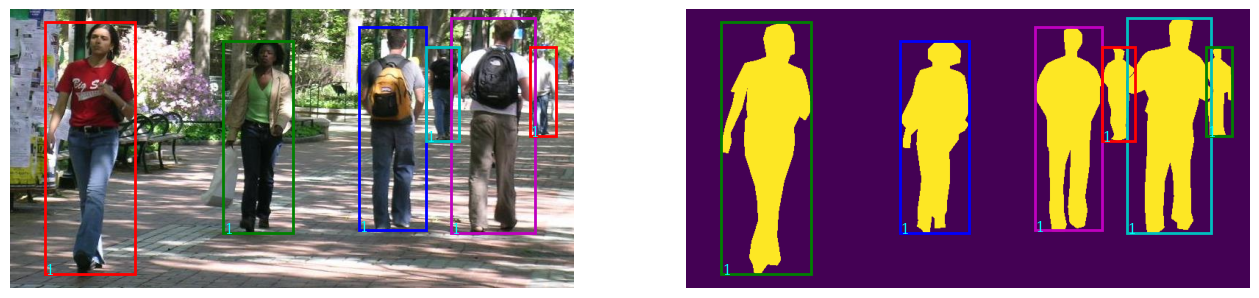

In [8]:
# For training
images, targets=next(iter(tarin_loader))
print(len(images), ' images ', [x.shape for x in images], [(x.dtype, x.min(), x.max()) for x in images])
print(len(targets), ' targets ', [{k:(v if not isinstance(v, torch.Tensor) else v.shape) for k, v in target.items()} for target in targets])
print('masks ', [(target['masks'].dtype, target['masks'].min(), target['masks'].max()) for target in targets])


for i in range(len(images)):
  annotation={'bbox':[[box.squeeze()[2*i:(2*i+2)] for i in range(2)] for box in targets[i]['boxes'].split(1, dim=0)],
              'label':[f'{l}' for l in targets[i]['labels']]}
  display_image_overlay(image=(images[i]*255).type(torch.uint8), mask=targets[i]['masks'].sum(dim=0, keepdim=True), annotation=annotation)

In [ ]:
model.backbone

BackboneWithFPN(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): 

In [ ]:
print('body return_layers ', model.backbone.body.return_layers)
model.backbone.body

body return_layers  {'layer1': '0', 'layer2': '1', 'layer3': '2', 'layer4': '3'}


IntermediateLayerGetter(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [ ]:
model.backbone.fpn

FeaturePyramidNetwork(
  (inner_blocks): ModuleList(
    (0): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Conv2dNormActivation(
      (0): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Conv2dNormActivation(
      (0): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): Conv2dNormActivation(
      (0): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer_blocks): ModuleList(
    (0-3): 4 x Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1,

In [ ]:
model.rpn

RegionProposalNetwork(
  (anchor_generator): AnchorGenerator()
  (head): RPNHead(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
      )
      (1): Conv2dNormActivation(
        (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
      )
    )
    (cls_logits): Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))
    (bbox_pred): Conv2d(256, 12, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [ ]:
model.roi_heads.mask_roi_pool

MultiScaleRoIAlign(featmap_names=['0', '1', '2', '3'], output_size=(14, 14), sampling_ratio=2)

In [ ]:
model.roi_heads.mask_head

MaskRCNNHeads(
  (0): Conv2dNormActivation(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (1): Conv2dNormActivation(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (2): Conv2dNormActivation(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (3): Conv2dNormActivation(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
)

In [ ]:
model.roi_heads.mask_predictor

MaskRCNNPredictor(
  (conv5_mask): ConvTranspose2d(256, 256, kernel_size=(2, 2), stride=(2, 2))
  (relu): ReLU(inplace=True)
  (mask_fcn_logits): Conv2d(256, 91, kernel_size=(1, 1), stride=(1, 1))
)

2  images  [torch.Size([3, 368, 542]), torch.Size([3, 436, 712])] [(torch.float32, tensor(0.), tensor(1.)), (torch.float32, tensor(0.), tensor(1.))]
2  targets  [{'boxes': torch.Size([4, 4]), 'masks': torch.Size([4, 368, 542]), 'labels': torch.Size([4]), 'image_id': 87, 'area': torch.Size([4]), 'iscrowd': torch.Size([4])}, {'boxes': torch.Size([3, 4]), 'masks': torch.Size([3, 436, 712]), 'labels': torch.Size([3]), 'image_id': 94, 'area': torch.Size([3]), 'iscrowd': torch.Size([3])}]
masks  [(torch.uint8, tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8)), (torch.uint8, tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8))]


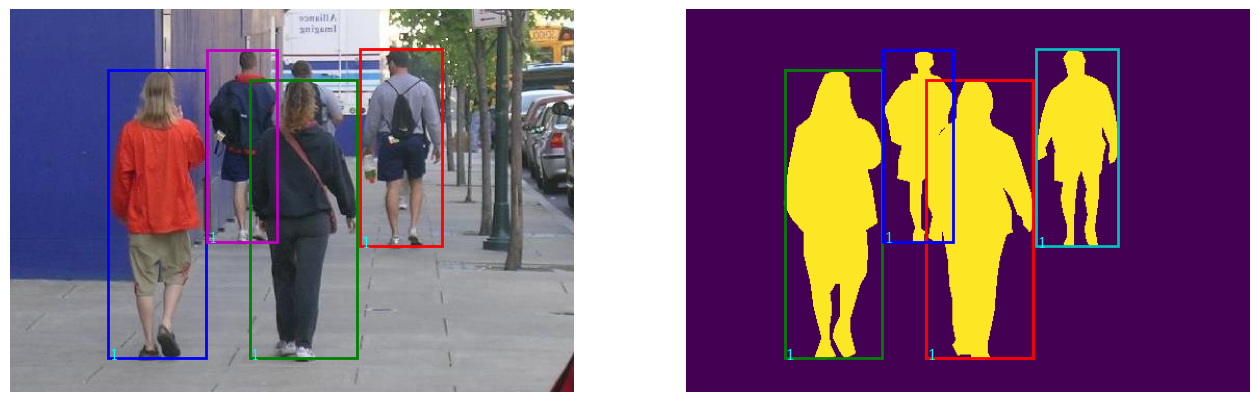

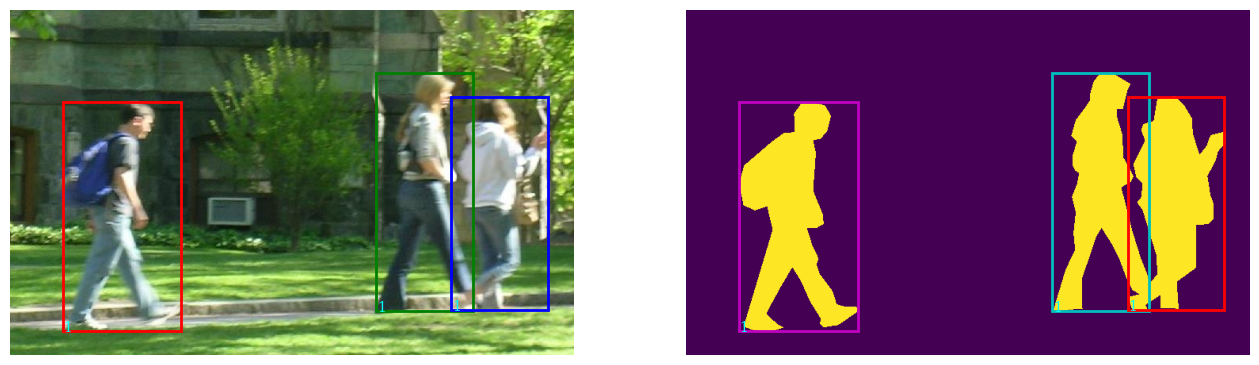

In [9]:
# For training
images, targets=next(iter(tarin_loader))
print(len(images), ' images ', [x.shape for x in images], [(x.dtype, x.min(), x.max()) for x in images])
print(len(targets), ' targets ', [{k:(v if not isinstance(v, torch.Tensor) else v.shape) for k, v in target.items()} for target in targets])
print('masks ', [(target['masks'].dtype, target['masks'].min(), target['masks'].max()) for target in targets])


for i in range(len(images)):
    annotation={'bbox':[[box.squeeze()[2*i:(2*i+2)] for i in range(2)] for box in targets[i]['boxes'].split(1, dim=0)],
              'label':[f'{l}' for l in targets[i]['labels']]}
    display_image_overlay(image=(images[i]*255).type(torch.uint8), mask=targets[i]['masks'].sum(dim=0, keepdim=True), annotation=annotation)

### Training `forward()`

In [10]:
# check that bounding box size is correct
for target in targets:
    boxes=target['boxes']
    if isinstance(boxes, torch.Tensor):
        assert(len(boxes.shape)==2 and boxes.shape[-1]==4), f'Expected target boxes to be a tensor of shape [N,4], got {boxes.shape}'
    else:
        assert False, f'Expected target boxes to be of type Tensor, got {type(boxes)}.'

In [11]:
# check for degenerate boxes
for target_idx, target in enumerate(targets):
    boxes=target['boxes']
    # Nx2 because this check element wise whether x2, y2 <= x1, y1
    degenerate_boxes=boxes[:,2:]<=boxes[:, :2]
    if degenerate_boxes.any():
        bb_idx=torch.where(degenerate_boxes.any(dim=1)) # which box in N and which dimension, e.g., box 1 along y dim
        degen_bb=boxes[bb_idx].tolist()
        assert False, f'All bounding boxes should have positive height and width\nFound invalid box {degen_bb} for target at index {target_idx}'

In [12]:
original_image_sizes=[]
for img in images:
    size=img.shape[-2:]
    print(img.shape, img.min(), img.max())
    assert len(size)==2, f'Expect the last two dimensions of the Tensor to be H and W, but got {img.shape[-2:]} instead'
    original_image_sizes.append((size[0], size[1]))
print('original_image_sizes ', original_image_sizes)

torch.Size([3, 368, 542]) tensor(0.) tensor(1.)
torch.Size([3, 436, 712]) tensor(0.) tensor(1.)
original_image_sizes  [(368, 542), (436, 712)]


In [13]:
targets[0]['boxes'], targets[0]['area']

(tensor([[337.,  39., 416., 228.],
         [231.,  68., 334., 336.],
         [ 95.,  59., 189., 336.],
         [190.,  40., 257., 224.]]),
 tensor([14931., 27604., 26038., 12328.]))

In [14]:
images_, targets_ = model.transform(images, targets)
print('images_ ', images_.tensors.shape, images_.tensors.min(), images_.tensors.max())
for i in range(len(targets_)):
    print('targets_ ', {k:(v.shape, v.min(), v.max(), v.dtype) if isinstance(v,torch.Tensor) else v for k, v in targets_[0].items()})
targets_[0]['boxes']

images_  torch.Size([2, 3, 800, 1312]) tensor(-2.0834) tensor(2.6400)
targets_  {'boxes': (torch.Size([4, 4]), tensor(84.7826), tensor(904.1476), torch.float32), 'masks': (torch.Size([4, 800, 1178]), tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8), torch.uint8), 'labels': (torch.Size([4]), tensor(1), tensor(1), torch.int64), 'image_id': 87, 'area': (torch.Size([4]), tensor(12328.), tensor(27604.), torch.float32), 'iscrowd': (torch.Size([4]), tensor(0), tensor(0), torch.int64)}
targets_  {'boxes': (torch.Size([4, 4]), tensor(84.7826), tensor(904.1476), torch.float32), 'masks': (torch.Size([4, 800, 1178]), tensor(0, dtype=torch.uint8), tensor(1, dtype=torch.uint8), torch.uint8), 'labels': (torch.Size([4]), tensor(1), tensor(1), torch.int64), 'image_id': 87, 'area': (torch.Size([4]), tensor(12328.), tensor(27604.), torch.float32), 'iscrowd': (torch.Size([4]), tensor(0), tensor(0), torch.int64)}


tensor([[732.4465,  84.7826, 904.1476, 495.6522],
        [502.0627, 147.8261, 725.9261, 730.4348],
        [206.4760, 128.2609, 410.7786, 730.4348],
        [412.9520,  86.9565, 558.5720, 486.9565]])

### Backbone Body

The `forward` function is from [`generalized_rcnn.py`](https://github.com/pytorch/vision/blob/main/torchvision/models/detection/generalized_rcnn.py) which is the base class of [`FasterRCNN`](https://github.com/pytorch/vision/blob/main/torchvision/models/detection/faster_rcnn.py) and [`MaskRCNN`](https://github.com/pytorch/vision/blob/main/torchvision/models/detection/mask_rcnn.py).

The `backbone` with `fpn` is defined in [`backbone_utils.py`](https://github.com/pytorch/vision/blob/main/torchvision/models/detection/backbone_utils.py)

In [15]:
from collections import OrderedDict

x=images_.tensors
print('x ', x.shape, x.min(), x.max())
print('return layers ', model.backbone.body.return_layers)
# we first pass the input images to body in the backbone (i.e., not FPN)
out = OrderedDict()
for name, module in model.backbone.body.items():
    x = module(x)
    print(name, x.shape)
    if name in model.backbone.body.return_layers:
        out_name = model.backbone.body.return_layers[name]
        out[out_name] = x
        print(name, out_name, x.shape)
print('\n\nout ', {k:(x.shape, x.min(), x.max(), x.dtype) for k, x in out.items()})

x  torch.Size([2, 3, 800, 1312]) tensor(-2.0834) tensor(2.6400)
return layers  {'layer1': '0', 'layer2': '1', 'layer3': '2', 'layer4': '3'}
conv1 torch.Size([2, 64, 400, 656])
bn1 torch.Size([2, 64, 400, 656])
relu torch.Size([2, 64, 400, 656])
maxpool torch.Size([2, 64, 200, 328])
layer1 torch.Size([2, 256, 200, 328])
layer1 0 torch.Size([2, 256, 200, 328])
layer2 torch.Size([2, 512, 100, 164])
layer2 1 torch.Size([2, 512, 100, 164])
layer3 torch.Size([2, 1024, 50, 82])
layer3 2 torch.Size([2, 1024, 50, 82])
layer4 torch.Size([2, 2048, 25, 41])
layer4 3 torch.Size([2, 2048, 25, 41])


out  {'0': (torch.Size([2, 256, 200, 328]), tensor(0.), tensor(3.6081), torch.float32), '1': (torch.Size([2, 512, 100, 164]), tensor(0., grad_fn=<MinBackward1>), tensor(4.0056, grad_fn=<MaxBackward1>), torch.float32), '2': (torch.Size([2, 1024, 50, 82]), tensor(0., grad_fn=<MinBackward1>), tensor(2.2655, grad_fn=<MaxBackward1>), torch.float32), '3': (torch.Size([2, 2048, 25, 41]), tensor(0., grad_fn=<Min

### Backbone FPN

Based on code at [`feature_pyramid_network.py`](https://github.com/pytorch/vision/blob/main/torchvision/ops/feature_pyramid_network.py#L183), where `extra_blocks` from [`LastLevelMaxPool`](https://github.com/pytorch/vision/blob/main/torchvision/ops/feature_pyramid_network.py)


In [18]:
model.backbone.fpn

FeaturePyramidNetwork(
  (inner_blocks): ModuleList(
    (0): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Conv2dNormActivation(
      (0): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Conv2dNormActivation(
      (0): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): Conv2dNormActivation(
      (0): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer_blocks): ModuleList(
    (0-3): 4 x Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1,

In [16]:
import torch.nn.functional as F

# we then pass feature to FPN
x=out
names=list(x.keys())
x=list(x.values())
print('names ', names)
print('x ', [i.shape for i in x])

# we move from the output from the backbone-body deepest layer (having the bigger number of channels)
last_inner=model.backbone.fpn.inner_blocks[-1](x[-1])
print('last_inner ', last_inner.shape, last_inner.min(), last_inner.max())
results=[model.backbone.fpn.layer_blocks[-1](last_inner)]
print('last result ', results[0].shape, results[0].min(), results[0].max())

# we get from the one after deepest layer (i.e., top down)
for idx in range(len(x)-2, -1, -1):
    inner_lateral=model.backbone.fpn.inner_blocks[idx](x[idx])
    feat_shape=inner_lateral.shape[-2:]
    inner_top_down = F.interpolate(last_inner, size=feat_shape, mode="nearest")
    print(idx, ' last_inner ', last_inner.shape, ' feat_shape ', feat_shape, end=',')
    last_inner=inner_lateral+inner_top_down
    results.insert(0, model.backbone.fpn.layer_blocks[idx](last_inner))
    print(' updated_last_inner ', last_inner.shape, ' result ', results[0].shape)

print('\n\nresults ', [(r.shape, r.min(), r.max()) for r in results])

results, names =model.backbone.fpn.extra_blocks(results, x, names)

print('\n\nname:results ', {n:(r.shape, r.min(), r.max()) for n, r in zip(names,results)})

# make it back an OrderedDict
out=OrderedDict([(k,v) for k, v in zip(names, results)])

names  ['0', '1', '2', '3']
x  [torch.Size([2, 256, 200, 328]), torch.Size([2, 512, 100, 164]), torch.Size([2, 1024, 50, 82]), torch.Size([2, 2048, 25, 41])]
last_inner  torch.Size([2, 256, 25, 41]) tensor(-1.3613, grad_fn=<MinBackward1>) tensor(1.1797, grad_fn=<MaxBackward1>)
last result  torch.Size([2, 256, 25, 41]) tensor(-1.8228, grad_fn=<MinBackward1>) tensor(1.9089, grad_fn=<MaxBackward1>)
2  last_inner  torch.Size([2, 256, 25, 41])  feat_shape  torch.Size([50, 82]), updated_last_inner  torch.Size([2, 256, 50, 82])  result  torch.Size([2, 256, 50, 82])
1  last_inner  torch.Size([2, 256, 50, 82])  feat_shape  torch.Size([100, 164]), updated_last_inner  torch.Size([2, 256, 100, 164])  result  torch.Size([2, 256, 100, 164])
0  last_inner  torch.Size([2, 256, 100, 164])  feat_shape  torch.Size([200, 328]), updated_last_inner  torch.Size([2, 256, 200, 328])  result  torch.Size([2, 256, 200, 328])


results  [(torch.Size([2, 256, 200, 328]), tensor(-2.2325, grad_fn=<MinBackward1>), ten

### Region Proposal Network (RPN)

This is for the line
```
proposals, proposal_losses = self.rpn(images, features, targets)
```
in [`generalized_rcnn.py`](https://github.com/pytorch/vision/blob/main/torchvision/models/detection/generalized_rcnn.py) which calls `rpn` defined on [`rpn.py`](https://github.com/pytorch/vision/blob/main/torchvision/models/detection/rpn.py)

In [22]:
model.rpn.head

RPNHead(
  (conv): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
    (1): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
  )
  (cls_logits): Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))
  (bbox_pred): Conv2d(256, 12, kernel_size=(1, 1), stride=(1, 1))
)

In [17]:
# RPN uses all feature maps that are available
features=list(out.values())
print('features ', [f.shape for f in features])

# call RPNHead
objectness=[] # logits
pred_bbox_deltas=[] # bbox_reg
for i, feature in enumerate(features):
    t=model.rpn.head.conv(feature)
    objectness.append(model.rpn.head.cls_logits(t))
    pred_bbox_deltas.append(model.rpn.head.bbox_pred(t))
    print(i, ' feature ', feature.shape, ' t ', t.shape, ' objectness ', objectness[-1].shape, objectness[-1].min().item(),
          objectness[-1].max().item(), ' pred_bbox_deltas ', pred_bbox_deltas[-1].shape, pred_bbox_deltas[-1].min().item(),
          pred_bbox_deltas[-1].max().item())

features  [torch.Size([2, 256, 200, 328]), torch.Size([2, 256, 100, 164]), torch.Size([2, 256, 50, 82]), torch.Size([2, 256, 25, 41]), torch.Size([2, 256, 13, 21])]
0  feature  torch.Size([2, 256, 200, 328])  t  torch.Size([2, 256, 200, 328])  objectness  torch.Size([2, 3, 200, 328]) -24.287776947021484 6.490224361419678  pred_bbox_deltas  torch.Size([2, 12, 200, 328]) -2.6888811588287354 2.0785160064697266
1  feature  torch.Size([2, 256, 100, 164])  t  torch.Size([2, 256, 100, 164])  objectness  torch.Size([2, 3, 100, 164]) -20.52540397644043 6.406083583831787  pred_bbox_deltas  torch.Size([2, 12, 100, 164]) -2.0301618576049805 2.085693359375
2  feature  torch.Size([2, 256, 50, 82])  t  torch.Size([2, 256, 50, 82])  objectness  torch.Size([2, 3, 50, 82]) -18.493640899658203 8.7354736328125  pred_bbox_deltas  torch.Size([2, 12, 50, 82]) -1.552107572555542 1.6593995094299316
3  feature  torch.Size([2, 256, 25, 41])  t  torch.Size([2, 256, 25, 41])  objectness  torch.Size([2, 3, 25, 41])

In [22]:
# compute anchors
print('sizes  ', model.rpn.anchor_generator.sizes )
print('aspect_ratios ', model.rpn.anchor_generator.aspect_ratios)
print(len(model.rpn.anchor_generator.cell_anchors), ' cell_anchors  ', [an.shape for an in model.rpn.anchor_generator.cell_anchors],
      model.rpn.anchor_generator.cell_anchors[0] )

grid_sizes=[feature.shape[-2:] for feature in features]
image_size=images_.tensors.shape[-2:]
print('\ngrid_size ', grid_sizes, ' image_size ', image_size)
dtype,device=features[0].dtype, features[0].device
strides=[
    [torch.empty((), dtype=torch.int64, device=device).fill_(image_size[0]//g[0]),
     torch.empty((), dtype=torch.int64, device=device).fill_(image_size[1]//g[1])]
    for g in grid_sizes
]
print('stride ', strides)
# set model.rpn.anchor_generator.cell_anchors to dtype and move them to device
model.rpn.anchor_generator.set_cell_anchors(dtype, device)

sizes   ((32,), (64,), (128,), (256,), (512,))
aspect_ratios  ((0.5, 1.0, 2.0), (0.5, 1.0, 2.0), (0.5, 1.0, 2.0), (0.5, 1.0, 2.0), (0.5, 1.0, 2.0))
5  cell_anchors   [torch.Size([3, 4]), torch.Size([3, 4]), torch.Size([3, 4]), torch.Size([3, 4]), torch.Size([3, 4])] tensor([[-23., -11.,  23.,  11.],
        [-16., -16.,  16.,  16.],
        [-11., -23.,  11.,  23.]])

grid_size  [torch.Size([200, 328]), torch.Size([100, 164]), torch.Size([50, 82]), torch.Size([25, 41]), torch.Size([13, 21])]  image_size  torch.Size([800, 1312])
stride  [[tensor(4), tensor(4)], [tensor(8), tensor(8)], [tensor(16), tensor(16)], [tensor(32), tensor(32)], [tensor(61), tensor(62)]]


In [23]:
model.rpn.anchor_generator.cell_anchors

[tensor([[-23., -11.,  23.,  11.],
         [-16., -16.,  16.,  16.],
         [-11., -23.,  11.,  23.]]),
 tensor([[-45., -23.,  45.,  23.],
         [-32., -32.,  32.,  32.],
         [-23., -45.,  23.,  45.]]),
 tensor([[-91., -45.,  91.,  45.],
         [-64., -64.,  64.,  64.],
         [-45., -91.,  45.,  91.]]),
 tensor([[-181.,  -91.,  181.,   91.],
         [-128., -128.,  128.,  128.],
         [ -91., -181.,   91.,  181.]]),
 tensor([[-362., -181.,  362.,  181.],
         [-256., -256.,  256.,  256.],
         [-181., -362.,  181.,  362.]])]

In [ ]:

        self.set_cell_anchors(dtype, device)
        anchors_over_all_feature_maps = self.grid_anchors(grid_sizes, strides)
        anchors: list[list[torch.Tensor]] = []
        for _ in range(len(image_list.image_sizes)):
            anchors_in_image = [anchors_per_feature_map for anchors_per_feature_map in anchors_over_all_feature_maps]
            anchors.append(anchors_in_image)
        anchors = [torch.cat(anchors_per_image) for anchors_per_image in anchors]

In [ ]:
        # RPN uses all feature maps that are available
        features = list(features.values())
        objectness, pred_bbox_deltas = self.head(features)
        anchors = self.anchor_generator(images, features)

        num_images = len(anchors)
        num_anchors_per_level_shape_tensors = [o[0].shape for o in objectness]
        num_anchors_per_level = [s[0] * s[1] * s[2] for s in num_anchors_per_level_shape_tensors]
        objectness, pred_bbox_deltas = concat_box_prediction_layers(objectness, pred_bbox_deltas)
        # apply pred_bbox_deltas to anchors to obtain the decoded proposals
        # note that we detach the deltas because Faster R-CNN do not backprop through
        # the proposals
        proposals = self.box_coder.decode(pred_bbox_deltas.detach(), anchors)
        proposals = proposals.view(num_images, -1, 4)
        boxes, scores = self.filter_proposals(proposals, objectness, images.image_sizes, num_anchors_per_level)

        losses = {}
        if self.training:
            if targets is None:
                raise ValueError("targets should not be None")
            labels, matched_gt_boxes = self.assign_targets_to_anchors(anchors, targets)
            regression_targets = self.box_coder.encode(matched_gt_boxes, anchors)
            loss_objectness, loss_rpn_box_reg = self.compute_loss(
                objectness, pred_bbox_deltas, labels, regression_targets
            )
            losses = {
                "loss_objectness": loss_objectness,
                "loss_rpn_box_reg": loss_rpn_box_reg,
            }
